# Credit Card Fraud Analysis

## Import Libraries

In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.under_sampling import NearMiss
from collections import Counter

# Classifier Libraries 
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier


file_path = "data/creditcard.csv"

## Data Exploration

In [211]:
df = pd.read_csv(file_path)
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### Fraud vs. Non-Fraud Cases

([<matplotlib.patches.Wedge at 0x12b018dd0>,
 [Text(-0.005969650178434203, -1.09998380137016, 'Non-fraud'),
  Text(0.005969567707642693, 1.0999838018177286, 'Fraud')],
 [Text(-0.003256172824600474, -0.5999911643837235, '99.8%'),
  Text(0.003256127840532378, 0.5999911646278518, '0.2%')])

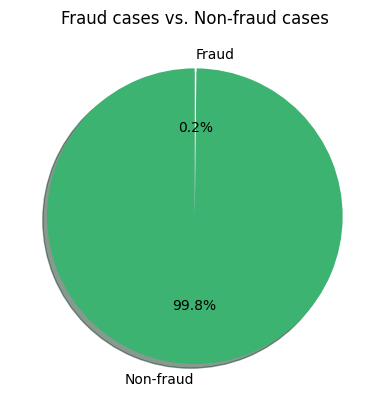

In [212]:
# Pie chart of fraud cases vs. non-fraud cases
labels = 'Non-fraud', 'Fraud'

non_frauds = df['Class'].value_counts()[0]
frauds = df['Class'].value_counts()[1]

sizes = [non_frauds, frauds]
colors = ['mediumseagreen', 'ghostwhite']

fig, ax = plt.subplots()
ax.set_title('Fraud cases vs. Non-fraud cases')
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)

Only a very small fraction of transaction are actually fraud, this shows that our data is severely unbalanced.

#### Transaction amount vs. Number of Transactions

(0.0, 25691.16)

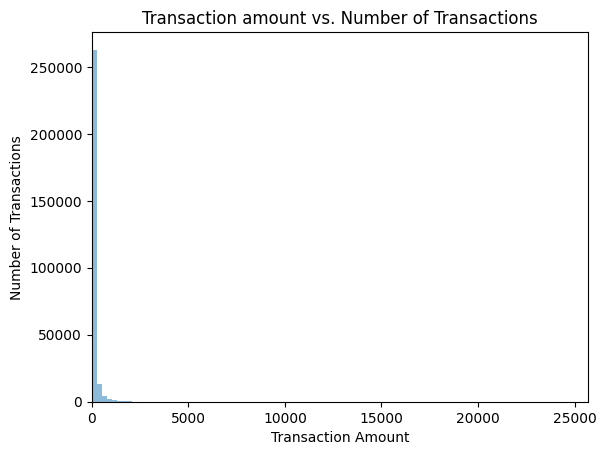

In [213]:
# Histogram of transaction amounts
fig, ax = plt.subplots()

ax.set_title('Transaction amount vs. Number of Transactions')
ax.hist(df['Amount'], bins=100, alpha=0.5)
ax.set_xlabel('Transaction Amount')
ax.set_ylabel('Number of Transactions')
ax.set_xlim((min(df['Amount']), max(df['Amount'])))

We see that a majority of transactions are within the $0 to $2500 range, with a few others reaching up to $25000

#### Transaction Times

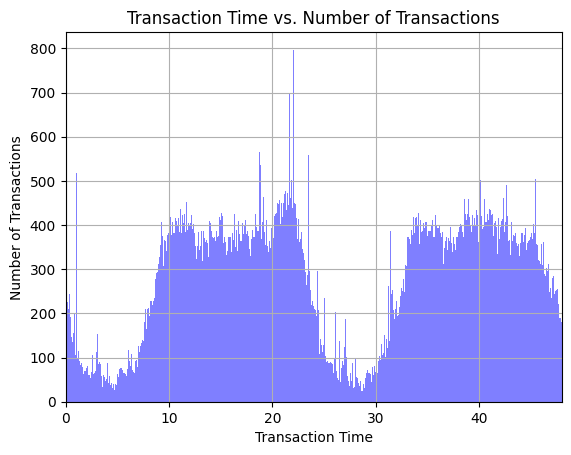

In [214]:
# Histogram of transaction times
fig, ax = plt.subplots()
time = df['Time'].values / 3600

ax.hist(time, color='blue', alpha=0.5, bins=1000)
ax.set_title('Transaction Time vs. Number of Transactions')

ax.set_xlabel('Transaction Time')
ax.set_ylabel('Number of Transactions')

ax.set_xlim([min(time), max(time)])
ax.grid('on')

Note that the time here represents the time between the current transaction and the first transaction in the data

## Pre-Processing The Data

In [215]:
std_scale = StandardScaler()
rob_scale = RobustScaler()

df['scaled_amount'] = rob_scale.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = rob_scale.fit_transform(df['Time'].values.reshape(-1, 1))

df.drop(['Time', 'Amount'], axis=1, inplace=True)

scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)
df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [216]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df)*100, 2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df)*100, 2), '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class']

skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in skf.split(X, y):
  print("Train:", train_index, "Test:", test_index)
  original_X_train, original_X_test = X.iloc[train_index], X.iloc[test_index]
  original_y_train, original_y_test = y.iloc[train_index], y.iloc[test_index]

# Turn into an array
original_X_train = original_X_train.values
original_X_test = original_X_test.values
original_y_train = original_y_train.values
original_y_test = original_y_test.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_y_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_y_test, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_y_train))
print(test_counts_label/ len(original_y_test))

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


In [217]:
non_fraud = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

print("No frauds", round(len(non_fraud) / len(df) * 100, 2), "% of the dataset")
print("Frauds", round(len(fraud) / len(df) * 100, 2), "% of the dataset")

X = df.drop('Class', axis=1)
Y = df['Class']

# Create testing set
skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in skf.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_Ytrain, original_Ytest = y.iloc[train_index], Y.iloc[test_index]

original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_Ytrain = original_Ytrain.values
original_Ytest = original_Ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_Ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_Ytest, return_counts=True)
print('_' * 100)

print('Label Distributions:')
print('Train: ', train_counts_label/ len(original_Ytrain))
print('Test: ', test_counts_label/ len(original_Ytest))


No frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
____________________________________________________________________________________________________
Label Distributions:
Train:  [0.99827076 0.00172924]
Test:  [0.99827952 0.00172048]


In [218]:
df = df.sample(frac=1)
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
154988,-0.169077,0.226036,0.156182,1.370295,-0.745877,0.422613,1.848217,-0.568477,1.738298,-0.769188,...,-0.187649,0.062255,0.620833,-0.288479,-1.121087,-0.598582,-0.638047,-0.204625,0.009430,0
151007,-0.293440,0.113606,-26.457745,16.497472,-30.177317,8.904157,-17.892600,-1.227904,-31.197329,-11.438920,...,2.812241,-8.755698,3.460893,0.896538,0.254836,-0.738097,-0.966564,-7.263482,-1.324884,1
44385,0.069867,-0.502461,-0.576419,0.204068,2.470278,-1.009050,-0.432111,-0.569857,0.364693,-0.115168,...,0.041440,-0.023534,0.085087,-0.092854,0.427712,-0.372678,0.792958,-0.139582,-0.111529,0
30473,-0.105359,-0.572728,-4.194074,4.382897,-5.118363,4.455230,-4.812621,-1.224645,-7.281328,3.332250,...,0.579098,1.550473,0.614573,0.028521,0.013704,-0.149512,-0.131687,0.473934,0.473757,1
140786,-0.293440,-0.008905,-0.433222,2.428379,-3.996454,4.871299,-1.796308,-0.586868,-4.654543,1.285230,...,0.745029,0.713559,-0.408954,-0.320890,-0.804230,0.962852,0.199558,1.094533,0.541148,1


Distribution of the classes
Class
0    0.5
1    0.5
Name: count, dtype: float64


([<matplotlib.patches.Wedge at 0x133c22510>,
 [Text(-1.1, 1.3471114790620887e-16, 'Non-fraud'),
  Text(1.1, -2.6942229581241775e-16, 'Fraud')],
 [Text(-0.6, 7.347880794884119e-17, '50.0%'),
  Text(0.6, -1.4695761589768238e-16, '50.0%')])

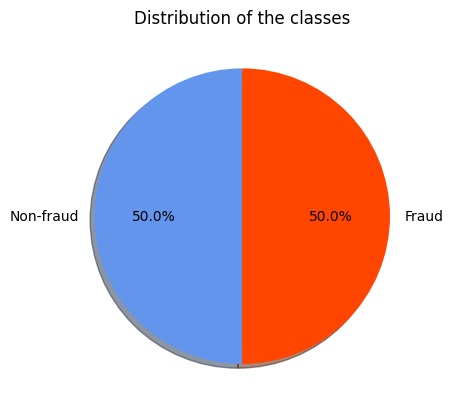

In [219]:
print("Distribution of the classes")
print(new_df['Class'].value_counts()/len(new_df))

# Create a plot of the distribution of the classes
colors = ['cornflowerblue', 'orangered']
fig, ax = plt.subplots()
ax.set_title('Distribution of the classes')
ax.pie(new_df['Class'].value_counts(), labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)

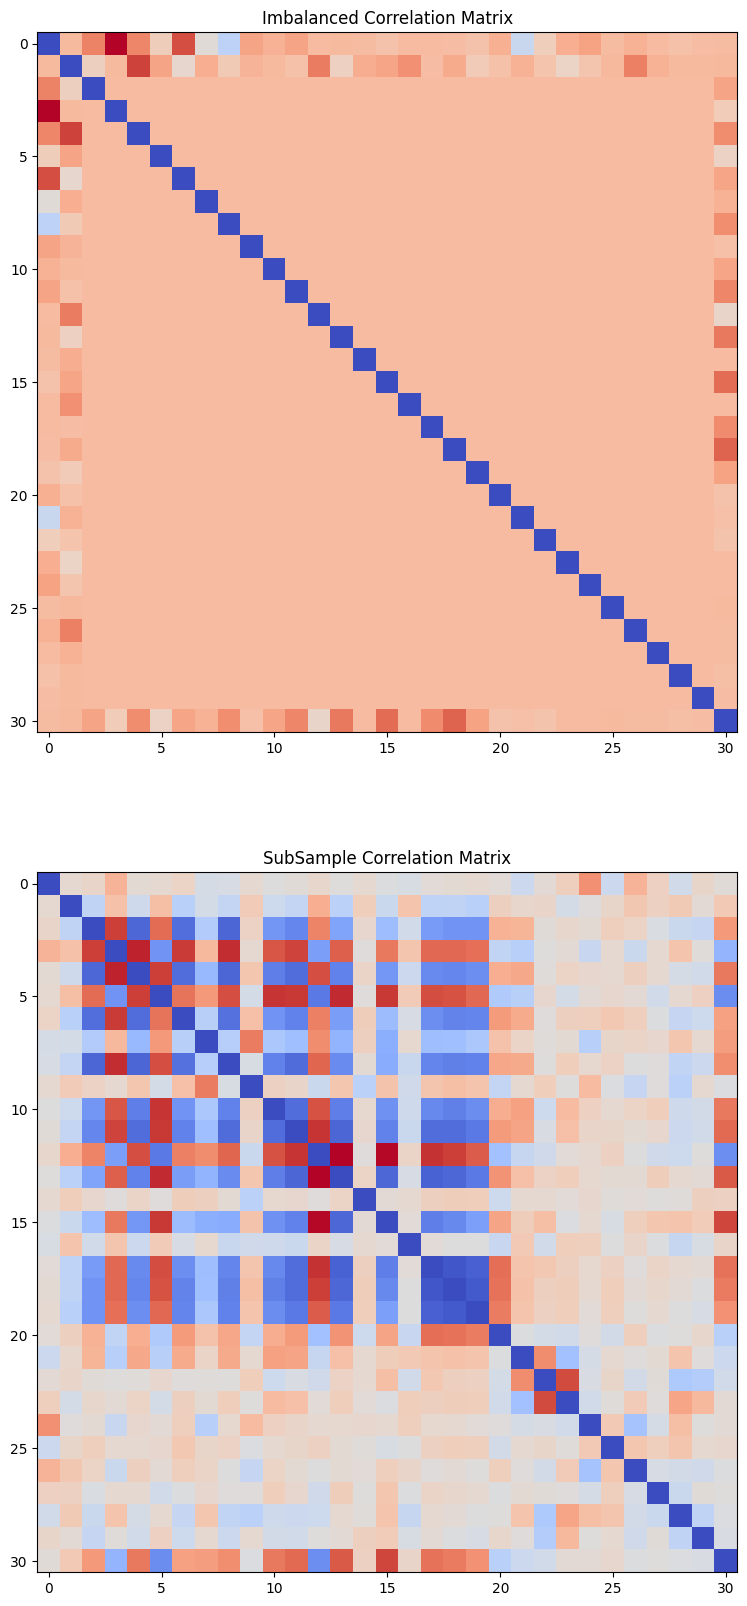

In [220]:
# Create a correlation matrix
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 20))

corr = df.corr()
ax1.imshow(corr, cmap='coolwarm_r', interpolation='none')
ax1.set_title('Imbalanced Correlation Matrix')

sub_sample_corr = new_df.corr()
ax2.imshow(sub_sample_corr, cmap='coolwarm_r', interpolation='none')
ax2.set_title('SubSample Correlation Matrix')

plt.show()

We see that the subsample that the correlations are much clearer due to the even split. This will be useful for detecting trends in our data

In [221]:
sol = (sub_sample_corr.where(np.triu(np.ones(sub_sample_corr.shape), k=1).astype(bool))
                 .stack()
                 .sort_values(ascending=False))

print(sol[0:9])
print(sol[-9:-1])

V16  V17    0.950343
V17  V18    0.934291
V16  V18    0.906978
V12  V16    0.899443
V3   V7     0.884538
V10  V12    0.882959
V1   V7     0.881561
V12  V14    0.877068
V1   V3     0.876225
dtype: float64
V4   V14   -0.794393
     V9    -0.798105
V10  V11   -0.802808
V11  V16   -0.807633
V2   V7    -0.825971
V4   V12   -0.833933
V2   V3    -0.843033
V11  V14   -0.891032
dtype: float64


In [222]:
print(sub_sample_corr['Class'].sort_values(ascending=False))

Class            1.000000
V4               0.703194
V11              0.696184
V2               0.487168
V19              0.275845
V20              0.164531
V21              0.127042
V28              0.081474
V27              0.064998
V8               0.064252
V25              0.062638
V26              0.042547
scaled_amount    0.021906
V23              0.009436
V22              0.008685
V24             -0.031037
V15             -0.051896
V13             -0.081602
scaled_time     -0.146411
V5              -0.383313
V6              -0.403895
V1              -0.424925
V18             -0.460694
V7              -0.476174
V17             -0.559327
V9              -0.564140
V3              -0.566551
V16             -0.595419
V10             -0.626361
V12             -0.680633
V14             -0.746958
Name: Class, dtype: float64


Notice that V2, V4, V11, V19 are very positively correlated with the class, whereas V10, V12, V14 and V16 are very negatively correlated.  \
Very positive correlation: Higher the value = more likely a fraud \
Very negative correlation: Lower the value = more liekly a fraud

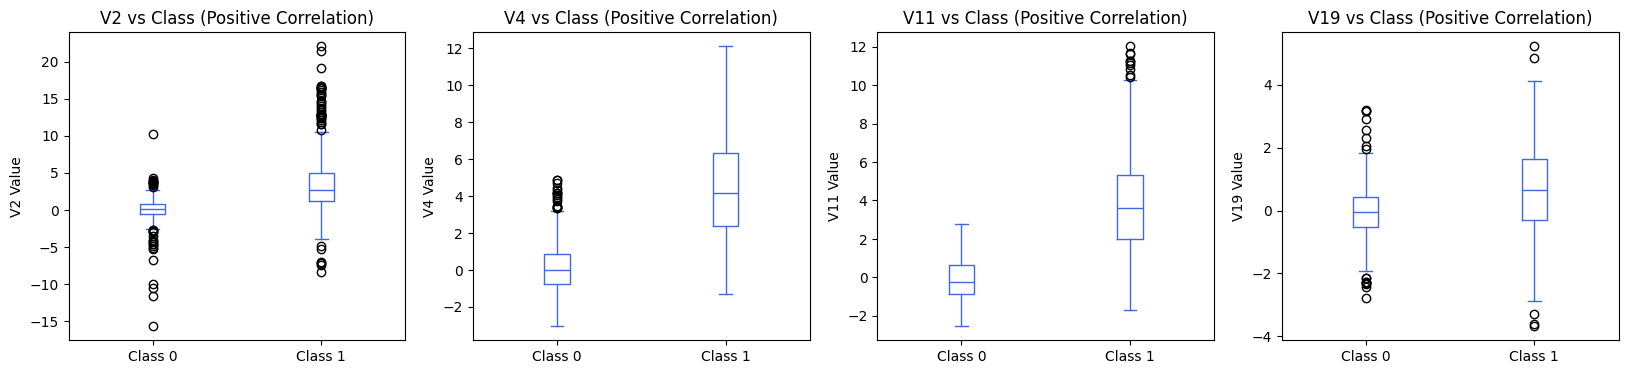

In [223]:
# Positive correlation
f, axes = plt.subplots(ncols=4, figsize=(20,4))

v2_non_fraud_data = new_df[new_df['Class'] == 0]['V2']  # Extract data for Class 0 (non-fraud)
v2_fraud_data = new_df[new_df['Class'] == 1]['V2']  # Extract data for Class 1 (fraud)

v4_non_fraud_data = new_df[new_df['Class'] == 0]['V4']  # Extract data for Class 0 (non-fraud)
v4_fraud_data = new_df[new_df['Class'] == 1]['V4']  # Extract data for Class 1 (fraud)

v11_non_fraud_data = new_df[new_df['Class'] == 0]['V11']  # Extract data for Class 0 (non-fraud)
v11_fraud_data = new_df[new_df['Class'] == 1]['V11']  # Extract data for Class 1 (fraud)

v19_non_fraud_data = new_df[new_df['Class'] == 0]['V19']  # Extract data for Class 0 (non-fraud)
v19_fraud_data = new_df[new_df['Class'] == 1]['V19']  # Extract data for Class 1 (fraud)

# Styling options
box_color = 'royalblue'  # Color of the boxes

v2_box = axes[0].boxplot([v2_non_fraud_data, v2_fraud_data], labels=['Class 0', 'Class 1'])
axes[0].set_title('V2 vs Class (Positive Correlation)')
axes[0].set_ylabel('V2 Value')

v4_box = axes[1].boxplot([v4_non_fraud_data, v4_fraud_data], labels=['Class 0', 'Class 1'])
axes[1].set_title('V4 vs Class (Positive Correlation)')
axes[1].set_ylabel('V4 Value')
    

v11_box = axes[2].boxplot([v11_non_fraud_data, v11_fraud_data], labels=['Class 0', 'Class 1'])
axes[2].set_title('V11 vs Class (Positive Correlation)')
axes[2].set_ylabel('V11 Value')

v19_box = axes[3].boxplot([v19_non_fraud_data, v19_fraud_data], labels=['Class 0', 'Class 1'])
axes[3].set_title('V19 vs Class (Positive Correlation)')
axes[3].set_ylabel('V19 Value')


# Apply styling to boxplot elements
for element in ['boxes', 'whiskers', 'medians', 'fliers', 'caps']:
    plt.setp(v2_box[element], color=box_color)
    plt.setp(v4_box[element], color=box_color)
    plt.setp(v11_box[element], color=box_color)
    plt.setp(v19_box[element], color=box_color)

plt.show()

Lower plot means more negative correlation

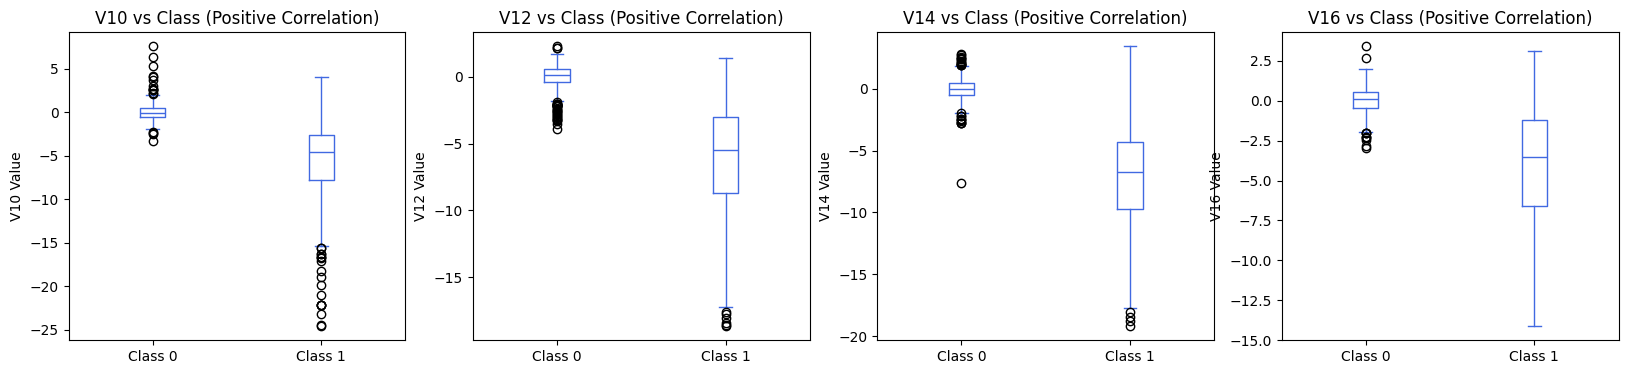

In [224]:
# Negative Correlation
f, axes = plt.subplots(ncols=4, figsize=(20,4))

v10_non_fraud_data = new_df[new_df['Class'] == 0]['V10']  # Extract data for Class 0 (non-fraud)
v10_fraud_data = new_df[new_df['Class'] == 1]['V10']  # Extract data for Class 1 (fraud)

v12_non_fraud_data = new_df[new_df['Class'] == 0]['V12']  # Extract data for Class 0 (non-fraud)
v12_fraud_data = new_df[new_df['Class'] == 1]['V12']  # Extract data for Class 1 (fraud)

v14_non_fraud_data = new_df[new_df['Class'] == 0]['V14']  # Extract data for Class 0 (non-fraud)
v14_fraud_data = new_df[new_df['Class'] == 1]['V14']  # Extract data for Class 1 (fraud)

v16_non_fraud_data = new_df[new_df['Class'] == 0]['V16']  # Extract data for Class 0 (non-fraud)
v16_fraud_data = new_df[new_df['Class'] == 1]['V16']  # Extract data for Class 1 (fraud)

v10_box = axes[0].boxplot([v10_non_fraud_data, v10_fraud_data], labels=['Class 0', 'Class 1'])
axes[0].set_title('V10 vs Class (Positive Correlation)')
axes[0].set_ylabel('V10 Value')

v12_box = axes[1].boxplot([v12_non_fraud_data, v12_fraud_data], labels=['Class 0', 'Class 1'])
axes[1].set_title('V12 vs Class (Positive Correlation)')
axes[1].set_ylabel('V12 Value')
    
v14_box = axes[2].boxplot([v14_non_fraud_data, v14_fraud_data], labels=['Class 0', 'Class 1'])
axes[2].set_title('V14 vs Class (Positive Correlation)')
axes[2].set_ylabel('V14 Value')

v16_box = axes[3].boxplot([v16_non_fraud_data, v16_fraud_data], labels=['Class 0', 'Class 1'])
axes[3].set_title('V16 vs Class (Positive Correlation)')
axes[3].set_ylabel('V16 Value')

# Styling options
for element in ['boxes', 'whiskers', 'medians', 'fliers', 'caps']:
    plt.setp(v10_box[element], color=box_color)
    plt.setp(v12_box[element], color=box_color)
    plt.setp(v14_box[element], color=box_color)
    plt.setp(v16_box[element], color=box_color)

plt.show()

Higher plot means more positive correlation

## Dimensionality Reduction

Because there are so many columns in the data, this obfuscates modelling and prediction. Dimensionality reduction algorithms needs to be applied to make the data more coherent

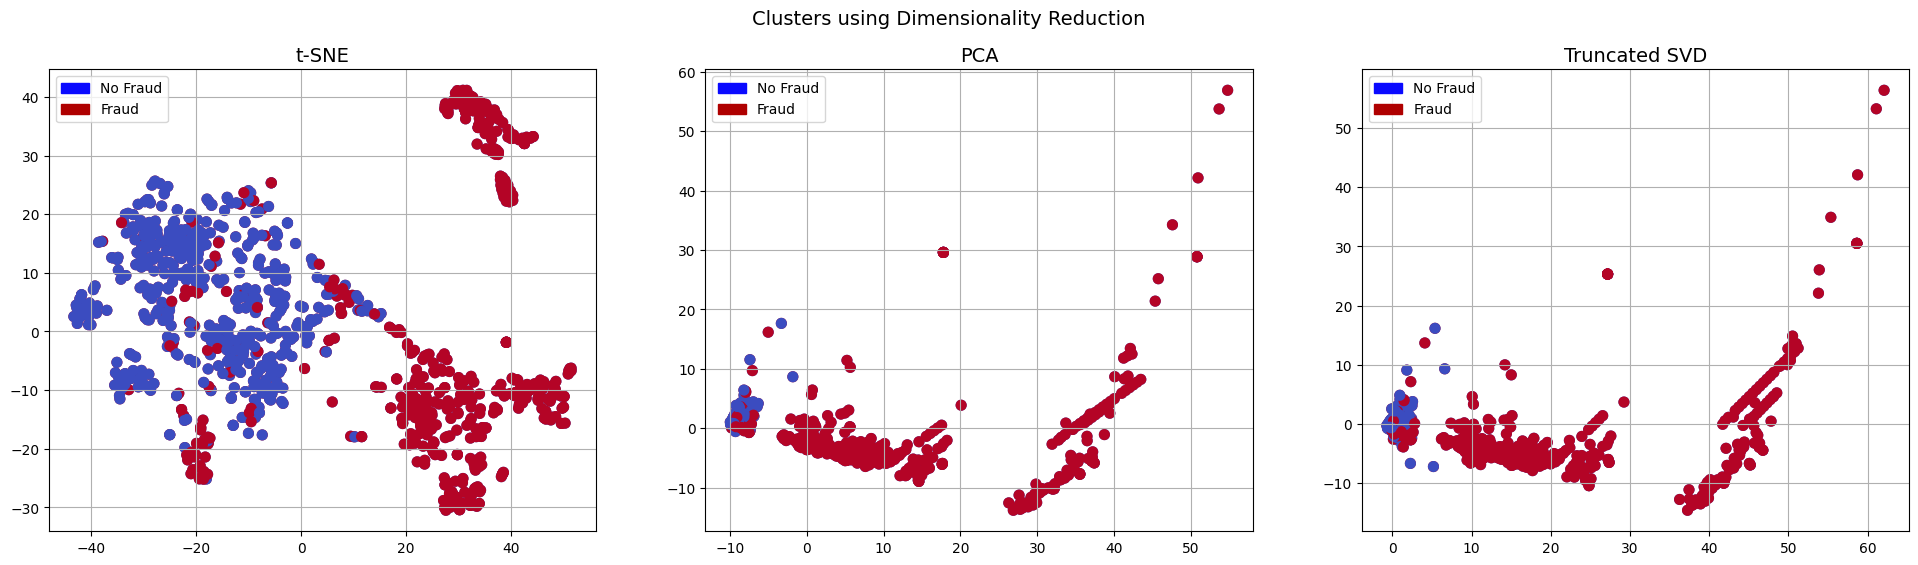

In [225]:
X = new_df.drop('Class', axis=1)
Y = new_df['Class']

# Dimensionality reduction algorithms we will compare are t-SNE, PCA and Truncated SVD

# t-SNE
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
# PCA
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
# Truncated SVD (basically PCA but for sparse data)
X_reduced_svd = TruncatedSVD(n_components=2, random_state=42).fit_transform(X.values)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(Y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(Y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])

# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(Y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(Y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(Y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(Y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()


## Classifiers (Undersampling)

In [226]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Turn values into an array for feeding the classifications algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

Logistic regression is used to predict the occurence of a fraud based on the reduced-dimensional data

In [227]:
# Logistic Regression
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

# xgboost
xgboost_params = {'objective': ["binary:logistic"]
      , 'eta': [0.01, 0.1, 0.2, 0.3]
			, 'max_depth': [3, 6, 9]
			, 'min_child_weight': [1, 10, 100, 1000]
			, 'eval_metric': ["auc"]
      }

grid_xgboost = GridSearchCV(XGBClassifier(), xgboost_params)
grid_xgboost.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
xgboost_model = grid_xgboost.best_estimator_

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

In [228]:
print(log_reg)
print(xgboost_model)


LogisticRegression(C=0.1)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric='auc',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=10, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)


In [229]:
# Overfitting Case

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', 
      round(log_reg_score.mean() * 100, 2).astype(str) + '%')

xgboost_score = cross_val_score(xgboost_model, X_train, y_train, cv=5)
print('XGBoost Cross Validation Score: ', 
      round(xgboost_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  93.77%
XGBoost Cross Validation Score:  94.03%


In [231]:
undersample_X = df.drop('Class', axis=1)
undersample_y = df['Class']

sss = StratifiedKFold(n_splits=5, shuffle=False)

for train_index, test_index in sss.split(undersample_X, undersample_y):
  print("Train:", train_index, "Test:", test_index)
  undersample_X_train, undersample_X_test = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
  undersample_y_train, undersample_y_test = undersample_y.iloc[train_index], undersample_y.iloc[test_index]

undersample_X_train = undersample_X_train.values
undersample_X_test = undersample_X_test.values
undersample_y_train = undersample_y_train.values
undersample_y_test = undersample_y_test.values 

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Implementing NearMiss Technique 
# Distribution of NearMiss (Just to see how it distributes the labels; we won't use these variables)
X_nearmiss, y_nearmiss = NearMiss().fit_resample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))

# Cross Validating the right way

for train, test in sss.split(undersample_X_train, undersample_y_train):
  undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg) # SMOTE happens during Cross Validation not before..
  undersample_model = undersample_pipeline.fit(undersample_X_train[train], undersample_y_train[train])
  undersample_prediction = undersample_model.predict(undersample_X_train[test])
  
  undersample_accuracy.append(undersample_pipeline.score(original_X_train[test], original_y_train[test]))
  undersample_precision.append(precision_score(original_y_train[test], undersample_prediction))
  undersample_recall.append(recall_score(original_y_train[test], undersample_prediction))
  undersample_f1.append(f1_score(original_y_train[test], undersample_prediction))
  undersample_auc.append(roc_auc_score(original_y_train[test], undersample_prediction))

Train: [ 53669  54029  54526 ... 284804 284805 284806] Test: [    0     1     2 ... 56964 56965 56966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 53669  54029  54526 ... 116931 117033 119561]
Train: [     0      1      2 ... 284804 284805 284806] Test: [113919 113920 113921 ... 170882 170883 171927]
Train: [     0      1      2 ... 284804 284805 284806] Test: [170884 170885 170886 ... 227843 227844 228901]
Train: [     0      1      2 ... 227843 227844 228901] Test: [227845 227846 227847 ... 284804 284805 284806]
NearMiss Label Distribution: Counter({0: 492, 1: 492})


In [253]:
def plot_learning_curve(estimator1, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, (ax1, ax2) = plt.subplots(1,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    
    # Logistic Regression
    train_sizes, train_scores, test_scores = learning_curve(estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124", label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff", label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")

    return plt

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/pyplot.py'>

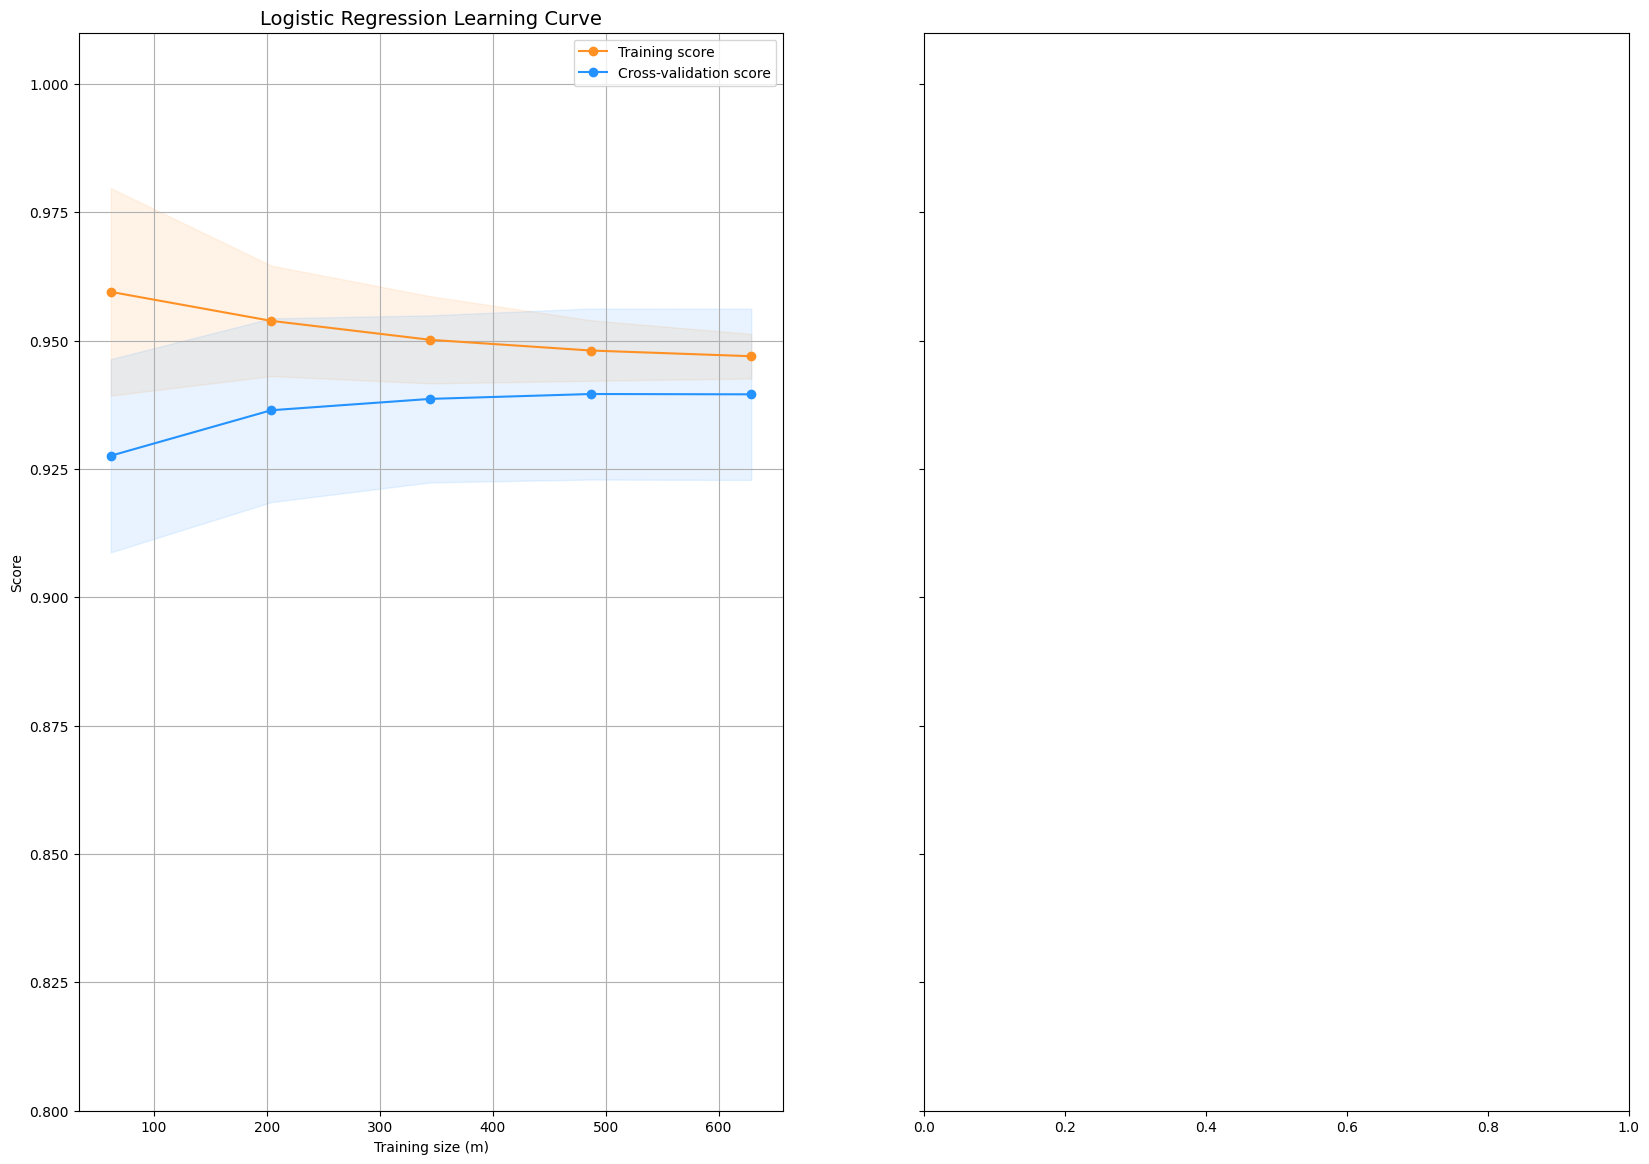

In [254]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, X_train, y_train, (0.8, 1.01), cv=cv, n_jobs=4)

In [234]:
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

In [235]:
print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))

Logistic Regression:  0.9766789477086161


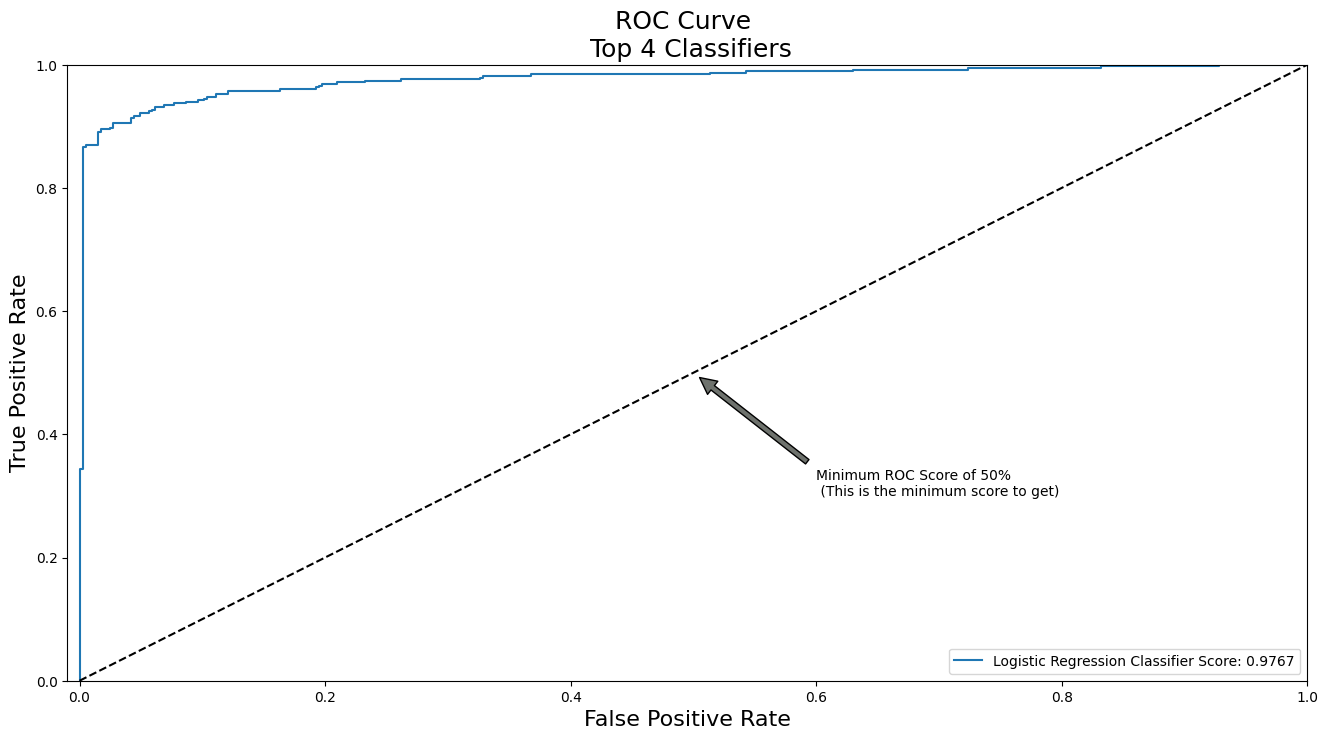

In [236]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)

def graph_roc_curve_multiple(log_fpr, log_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot([0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr)
plt.show()

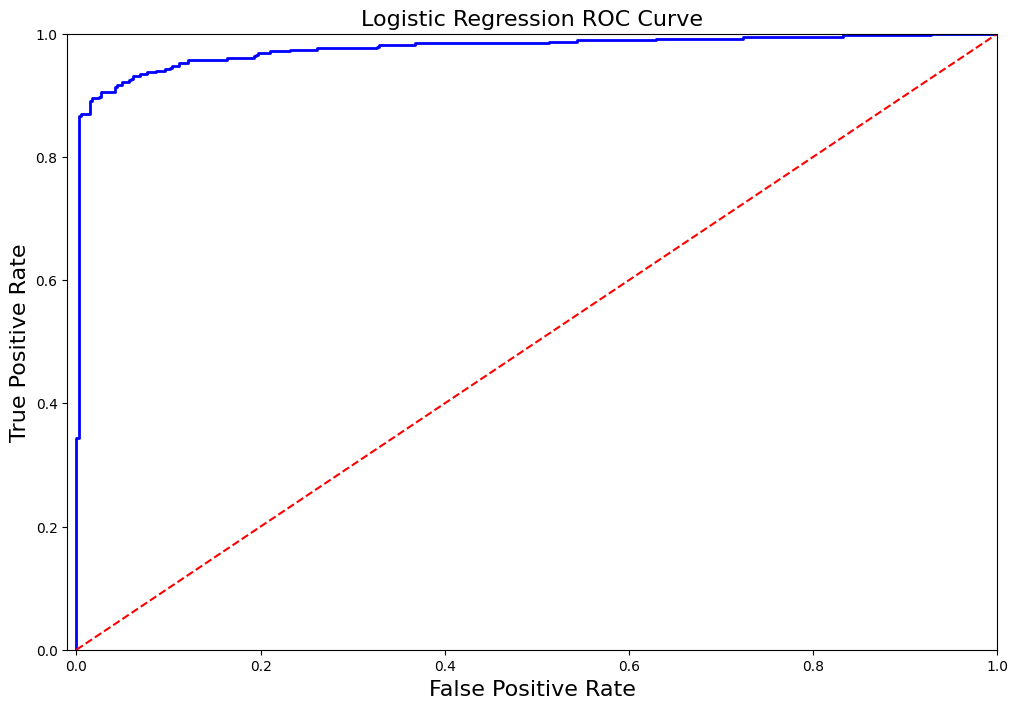

In [237]:
def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('Logistic Regression ROC Curve', fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])
    
    
logistic_roc_curve(log_fpr, log_tpr)
plt.show()

In [238]:
precision, recall, threshold = precision_recall_curve(y_train, log_reg_pred)

In [239]:
y_pred = log_reg.predict(X_train)

# Overfitting Case
print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)

# How it should look like
print('---' * 45)
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.96
Precision Score: 0.72
F1 Score: 0.82
Accuracy Score: 0.80
---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------
How it should be:

Accuracy Score: 0.73
Precision Score: 0.00
Recall Score: 0.22
F1 Score: 0.00
---------------------------------------------------------------------------------------------------------------------------------------


In [240]:
undersample_y_score = log_reg.decision_function(original_X_test)

In [241]:
undersample_average_precision = average_precision_score(original_y_test, 
                                                        undersample_y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      undersample_average_precision))

Average precision-recall score: 0.05


Text(0.5, 1.0, 'UnderSampling Precision-Recall curve: \n Average Precision-Recall Score =0.05')

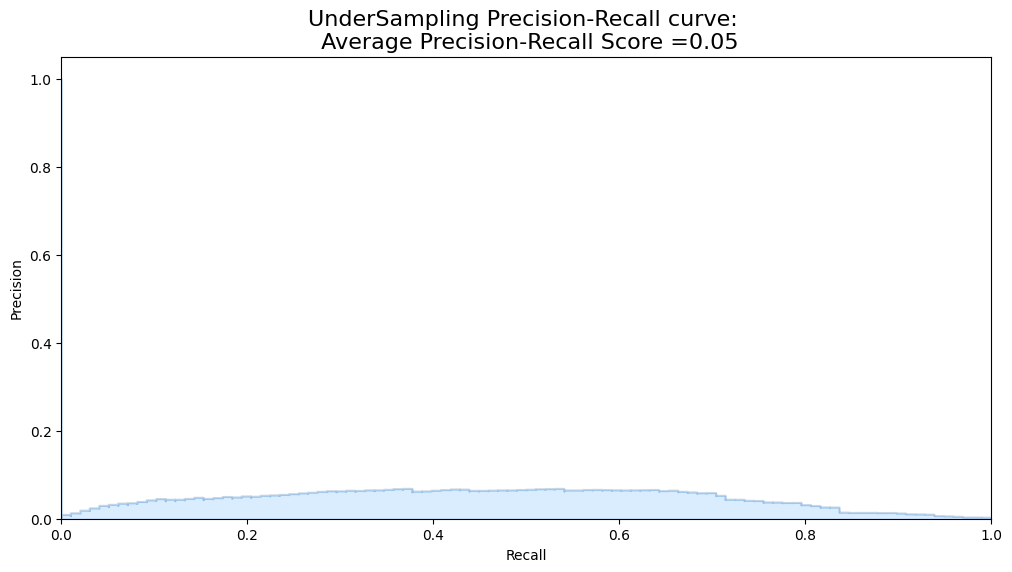

In [242]:
fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_y_test, undersample_y_score)

plt.step(recall, precision, color='#004a93', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#48a6ff')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('UnderSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          undersample_average_precision), fontsize=16)

In [250]:
y_pred = log_reg.predict(X_test)
undersample_score = accuracy_score(y_test, y_pred)

d = {'Technique': ['Random UnderSampling'], 
     'Score': [undersample_score]}
final_df = pd.DataFrame(data=d)

score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

final_df

,Technique,Score
0,Random UnderSampling,0.756345
